In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import skimage.filters

from google.colab import drive, files
drive.mount('/content/drive') # mount your google colab fil

Mounted at /content/drive


In [ ]:
images = []
labels = []
SIZE = 256

for directory_path in glob.glob("/content/drive/MyDrive/ML_IPData7/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        images.append(img.ravel())
        labels.append(label)

Rifle
Golf cart


In [ ]:
images = np.array(images)
type(labels)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(labels)
enc_labels = labelencoder.transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.20, random_state = 0)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

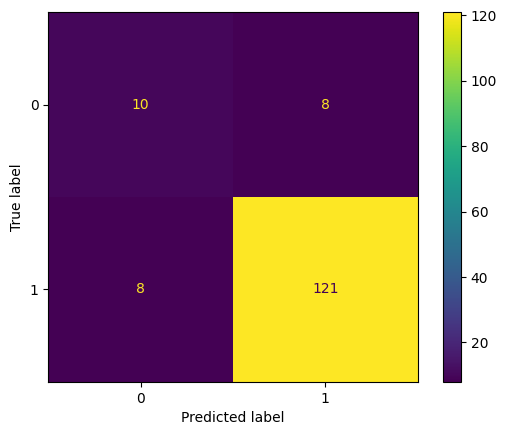

              precision    recall  f1-score   support

   Golf cart       0.56      0.56      0.56        18
       Rifle       0.94      0.94      0.94       129

    accuracy                           0.89       147
   macro avg       0.75      0.75      0.75       147
weighted avg       0.89      0.89      0.89       147

0.891156462585034
1.0


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.01)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
cf_display = ConfusionMatrixDisplay(cf)
cf_display.plot()
plt.show()
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(sgd.score((X_train), y_train))